here are the steps involved in this code:

**Step 1: Import Necessary Libraries**

Import essential libraries for data manipulation, model building, and evaluation.

**Step 2: Mount Google Drive**

Mount Google Drive to access the dataset, assuming the code is running in a Colab environment.

**Step 3: Load the Dataset**

Load the dataset from a CSV file stored in Google Drive using Pandas.

**Step 4: Split the Dataset**

Split the dataset into two parts: features (X) and the target variable (y).
Encode the target variable 'smoking' using LabelEncoder to convert it into numerical values (0 or 1).

**Step 5: Handle Categorical Variables**

Handle categorical variables such as 'gender,' 'oral,' and 'tartar' using one-hot encoding. This transforms them into binary columns for each category.

**Step 6: Normalize the Feature Values**

Normalize the feature values using the StandardScaler. This step standardizes the features to have a mean of 0 and a standard deviation of 1.

**Step 7: Split the Dataset for Training and Testing**

Split the dataset into training and testing sets, allocating 70% for training and 30% for testing.

**Step 8: Define Hyperparameter Grid**

Define a parameter grid for the Random Forest classifier. This grid includes hyperparameters like the number of estimators, maximum tree depth, and minimum samples for splitting nodes.

**Step 9: Create Grid Search**

Create a GridSearchCV object for Random Forest. GridSearchCV is used for hyperparameter tuning via cross-validation.

**Step 10: Fit the Model**

Fit the grid search to the training data, which explores different hyperparameter combinations to find the best model.

**Step 11: Make Predictions**

Use the best Random Forest model from the grid search to make predictions on the test data.

**Step 12: Evaluate the Model**

Evaluate the best model by calculating the accuracy, creating a confusion matrix, and generating a classification report. The classification report includes precision, recall, F1-scores, and support for both smokers and non-smokers.

**Step 13: Display Results**

Display the best hyperparameters, accuracy, confusion matrix, and classification report to assess the model's performance

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from a CSV file
data = pd.read_csv('/content/drive/My Drive/smoking.csv')

# Split the dataset into features (X) and the target variable (y)
X = data.drop("smoking", axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["smoking"])

# Handle categorical variables
X = pd.get_dummies(X, columns=["gender", "oral", "tartar"], drop_first=True)

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Best Random Forest Model Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)



Mounted at /content/drive
Best Random Forest Model Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.822240842710079
Confusion Matrix:
 [[8910 1647]
 [1323 4828]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86     10557
           1       0.75      0.78      0.76      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708





- **Best Model Hyperparameters:** Max Depth: None, Min Samples Split: 2, Estimators: 150
- **Accuracy:** 82.22%
- **Confusion Matrix:** TP=4,828, TN=8,910, FP=1,647, FN=1,323
- **Classification Report (F1-Scores):** Smokers (class 1) = 76%, Non-Smokers (class 0) = 86%


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

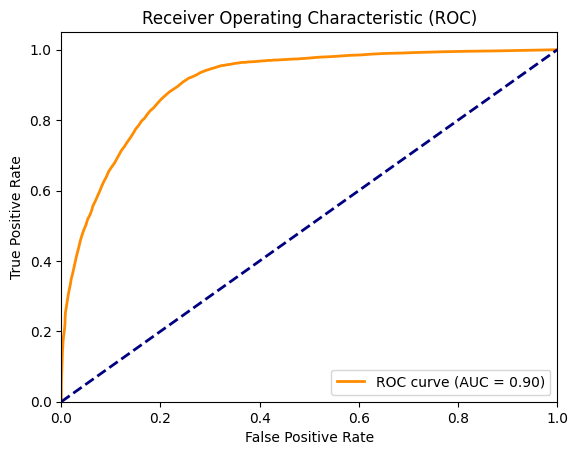

In [ ]:
# Get predicted probabilities for each class
y_prob = best_rf_model.predict_proba(X_test)
y_prob_positive = y_prob[:, 1]  # Take probabilities of the positive class

# Compute false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

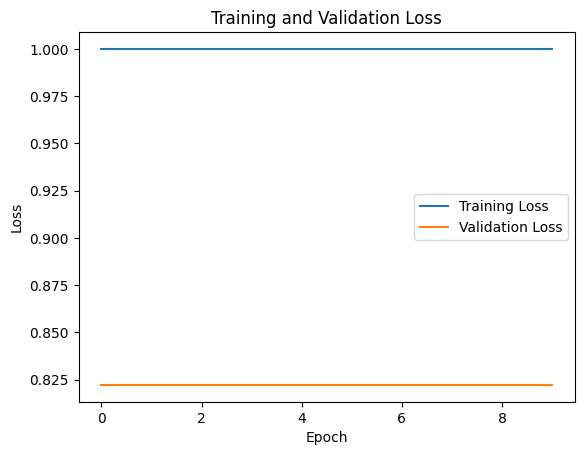

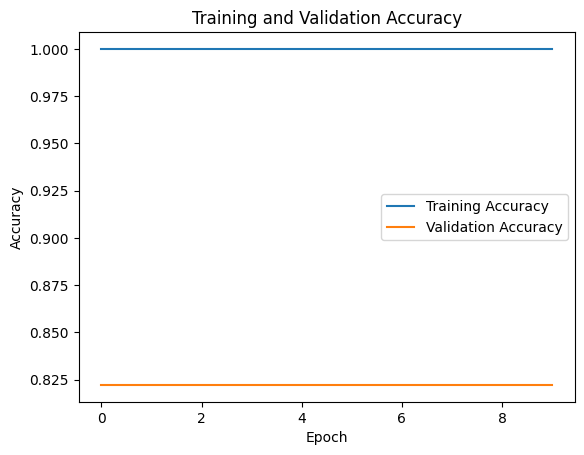

In [ ]:

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Fit the grid search to training data
for epoch in range(10):  #number of epochs
    grid_search.fit(X_train, y_train)

    # Get the best Random Forest model from the grid search
    best_rf_model = grid_search.best_estimator_

    # Make predictions on the training data
    y_train_pred = best_rf_model.predict(X_train)

    # Make predictions on the validation data
    y_val_pred = best_rf_model.predict(X_test)

    # Calculate training and validation metrics
    train_loss = accuracy_score(y_train, y_train_pred)
    val_loss = accuracy_score(y_test, y_val_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)

    # Append metrics to the lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Visualize the learning curves
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()